<a href="https://colab.research.google.com/github/Sk-Shakeel07/Deep-Learning-repo/blob/main/Lab_Assignment_08.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


#CSE 2794 – Machine Learning Workshop 2

#LAB ASSIGNMENT-8: TIME SERIES FORECASTING USING  RNN, LSTM and GRU MODELS

#Name: SK SHAKEEL AKHTAR
#Reg. No.: 2341001063
#Section: 23412C3

#1. Data Collection and Preparation
* Load the dataset in Python using libraries such as pandas.  
* Handle missing values (if any) and perform data pre-processing (e.g., setting the time index).

In [ ]:
import pandas as pd

    # Replace 'your_dataset.csv' with the actual path to your file
df = pd.read_csv('https://raw.githubusercontent.com/M3GHAN/stock-price-prediction-ARIMA-SARIMA/refs/heads/main/NSE-TATAGLOBAL.csv')
series=df

In [ ]:
# @title Check for missing values
print("Missing values before handling:")
print(series.isnull().sum())

# The 'Date' column seems like a good candidate for the time index
# Convert 'Date' to datetime objects and set it as the index
series['Date'] = pd.to_datetime(series['Date'])
series.set_index('Date', inplace=True)

# Sort the index in ascending order to ensure correct time series order
series.sort_index(inplace=True)

print("\nData after setting time index and sorting:")
print(series.head())

Missing values before handling:
Date                    0
Open                    0
High                    0
Low                     0
Last                    0
Close                   0
Total Trade Quantity    0
Turnover (Lacs)         0
dtype: int64

Data after setting time index and sorting:
             Open    High     Low    Last   Close  Total Trade Quantity  \
Date                                                                      
2010-07-21  122.1  123.00  121.05  121.10  121.55                658666   
2010-07-22  120.3  122.00  120.25  120.75  120.90                293312   
2010-07-23  121.8  121.95  120.25  120.35  120.65                281312   
2010-07-26  120.1  121.00  117.10  117.10  117.60                658440   
2010-07-27  117.6  119.50  112.00  118.80  118.65                586100   

            Turnover (Lacs)  
Date                         
2010-07-21           803.56  
2010-07-22           355.17  
2010-07-23           340.31  
2010-07-26           780.01

2. Exploratory Data Analysis (EDA)
* Plot the time series data to visualize trends, seasonality, and noise.  
* Perform stationarity tests using the Augmented Dickey-Fuller (ADF) test.
* Apply transformations (e.g., differencing or log transformation) to make the series stationary, if
necessar

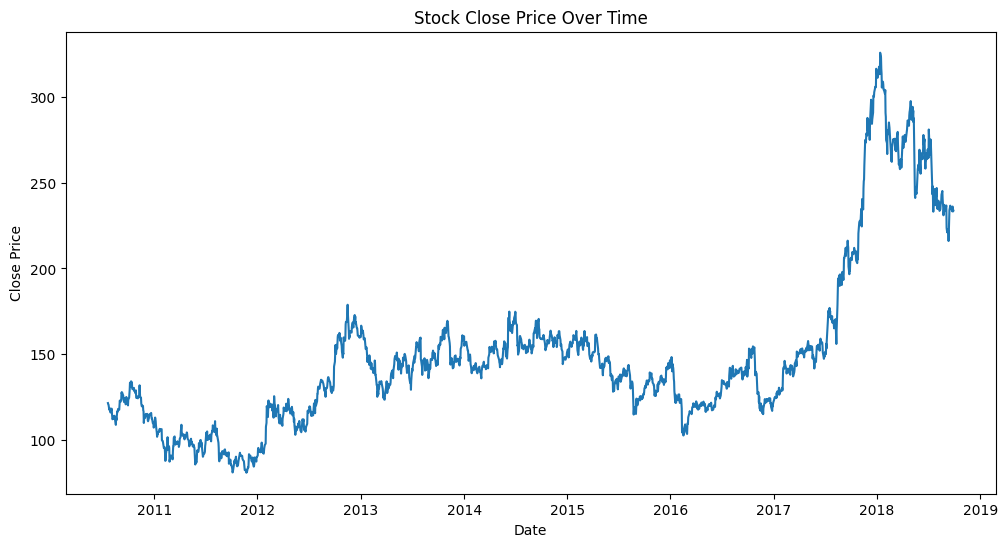


Augmented Dickey-Fuller Test:
ADF Statistic: -0.9013584739538786
P-value: 0.7875247234994129
The series is likely non-stationary.


In [ ]:
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller

# Plot the 'Close' price Eda
plt.figure(figsize=(12, 6))
plt.plot(series['Close'])
plt.title('Stock Close Price Over Time')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.show()

# Perform Augmented Dickey-Fuller test
print("\nAugmented Dickey-Fuller Test:")
adf_test = adfuller(series['Close'])
print(f'ADF Statistic: {adf_test[0]}')
print(f'P-value: {adf_test[1]}')

if adf_test[1] > 0.05:
    print("The series is likely non-stationary.")
else:
    print("The series is likely stationary.")

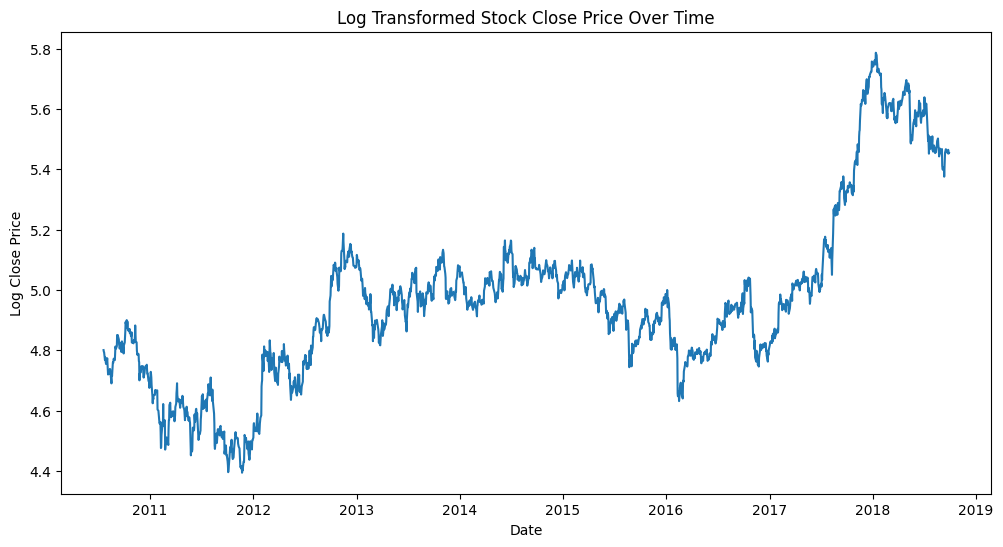


Augmented Dickey-Fuller Test:
ADF Statistic: -12.047901921370219
P-value: 2.6386271306409047e-22
The series is likely stationary.


In [ ]:
#  @title Apply transformations (e.g., differencing or log transformation) to make the series stationary, if
# necessary. \

# Option 1: Log Transformation
series['Close_log'] = np.log(series['Close'])
plt.figure(figsize=(12, 6))
plt.plot(series['Close_log'])
plt.title('Log Transformed Stock Close Price Over Time')
plt.xlabel('Date')
plt.ylabel('Log Close Price')
plt.show()
# check_stationarity(series['Close_log'].dropna()) # Drop NaN values introduced by log(0) if any

# Option 2: Differencing
# First order differencing
# Create the differenced series
series['Close_diff1'] = series['Close'].diff()

# Plot the differenced series (optional, uncomment if you want to see the plot)
# plt.figure(figsize=(12, 6))
# plt.plot(series['Close_diff1'])
# plt.title('First Order Differenced Stock Close Price Over Time')
# plt.xlabel('Date')
# plt.ylabel('Differenced Close Price')
# plt.show()

# Check stationarity on the differenced series, dropping NaNs
is_stationary_diff1 = check_stationarity(series['Close_diff1'])

In [ ]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# Assuming you have a single time series column 'Close' from the stock data
data = df['Close'].values.reshape(-1, 1) # Changed 'ValueColumn' to 'Close'

# Scale the data
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data)

# Create sequences
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)

seq_length = 10 # Define your sequence length
X, y = create_sequences(data_scaled, seq_length)

# Split into training and testing sets
train_size = int(len(X) * 0.8) # 80% for training
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# 3. Model Implementation
 Implement the following models.
1. RNN
2. LSTM
3. Bi-LSTM
4. GRU


In [ ]:
# @title RNN
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense

rnn_model = Sequential([
        SimpleRNN(units=50, activation='relu', input_shape=(seq_length, 1)),
        Dense(units=1)
    ])

rnn_model.compile(optimizer='adam', loss='mean_squared_error')
rnn_model.fit(X_train, y_train, epochs=10, batch_size=32) # Adjust epochs and batch size

Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


51/51 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0560
Epoch 2/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 9.2559e-04
Epoch 3/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 2.8250e-04
Epoch 4/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 2.5816e-04
Epoch 5/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 2.4917e-04
Epoch 6/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 2.0309e-04
Epoch 7/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.7773e-04
Epoch 8/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 1.7238e-04
Epoch 9/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 1.7526e-04
Epoch 10/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 1.6075e-04


In [ ]:
# @title LSTM
from tensorflow.keras.layers import LSTM
lstm_model = Sequential([
        LSTM(units=50, activation='relu', input_shape=(seq_length, 1)),
        Dense(units=1)
    ])

lstm_model.compile(optimizer='adam', loss='mean_squared_error')
lstm_model.fit(X_train, y_train, epochs=10, batch_size=32) # Adjust epochs and batch size

Epoch 1/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.0336
Epoch 2/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 5.7042e-04
Epoch 3/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 3.4608e-04
Epoch 4/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 3.4561e-04
Epoch 5/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 3.4890e-04
Epoch 6/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 3.1224e-04
Epoch 7/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 3.2985e-04
Epoch 8/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 3.4966e-04
Epoch 9/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 3.2998e-04
Epoch 10/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 3.0109e-04


In [ ]:
# @title Bi-LSTM
from tensorflow.keras.layers import Bidirectional

bi_lstm_model = Sequential([
        Bidirectional(LSTM(units=50, activation='relu'), input_shape=(seq_length, 1)),
        Dense(units=1)
    ])

bi_lstm_model.compile(optimizer='adam', loss='mean_squared_error')
bi_lstm_model.fit(X_train, y_train, epochs=10, batch_size=32) # Adjust epochs and batch size

Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


51/51 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - loss: 0.0200
Epoch 2/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 7.9590e-04
Epoch 3/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 4.5476e-04
Epoch 4/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 3.7239e-04
Epoch 5/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 3.6524e-04
Epoch 6/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 3.8200e-04
Epoch 7/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 3.2759e-04
Epoch 8/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 3.4179e-04
Epoch 9/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 3.1286e-04
Epoch 10/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 2.6574e-04


In [ ]:
 # @title GRU

from tensorflow.keras.layers import GRU
gru_model = Sequential([
        GRU(units=50, activation='relu', input_shape=(seq_length, 1)),
        Dense(units=1)
    ])

gru_model.compile(optimizer='adam', loss='mean_squared_error')
gru_model.fit(X_train, y_train, epochs=10, batch_size=32) # Adjust epochs and batch size

Epoch 1/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 0.0274
Epoch 2/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0011
Epoch 3/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2.3190e-04
Epoch 4/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 1.9474e-04
Epoch 5/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 2.1690e-04
Epoch 6/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 1.8981e-04
Epoch 7/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 1.9693e-04
Epoch 8/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 1.9152e-04
Epoch 9/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 1.6886e-04
Epoch 10/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 1.7363e-04


#4. Forecasting
* Generate forecasts for a defined horizon (e.g., next 1O or 20 time points).
* Plot actual vs. predicted values for comparison.

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


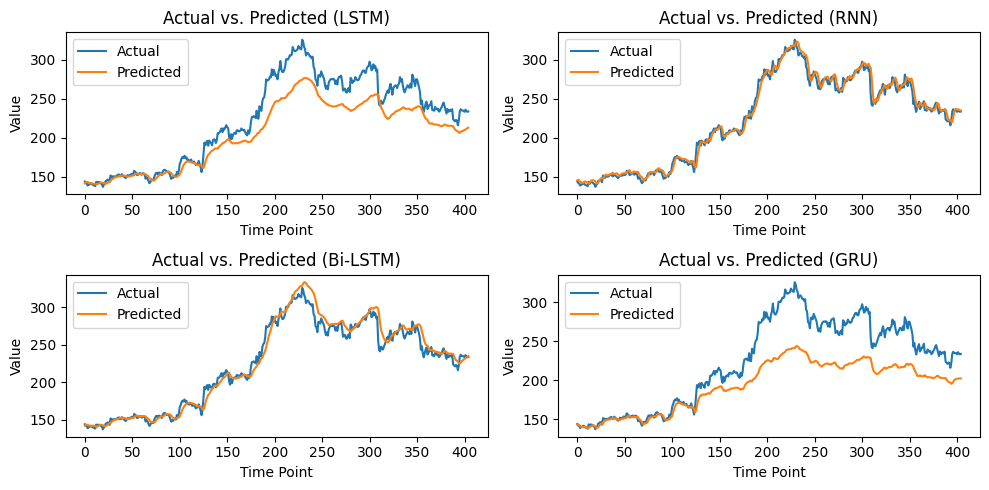

In [ ]:
# Forecasting with each model and getting original scale predictions

# LSTM predictions (already done in the previous block)
lstm_predictions_scaled = lstm_model.predict(X_test)
lstm_predictions = scaler.inverse_transform(lstm_predictions_scaled)
y_test_original = scaler.inverse_transform(y_test) # Need actuals for comparison

# RNN predictions
rnn_predictions_scaled = rnn_model.predict(X_test)
rnn_predictions = scaler.inverse_transform(rnn_predictions_scaled)

# Bi-LSTM predictions
bi_lstm_predictions_scaled = bi_lstm_model.predict(X_test)
bi_lstm_predictions = scaler.inverse_transform(bi_lstm_predictions_scaled)

# GRU predictions
gru_predictions_scaled = gru_model.predict(X_test)
gru_predictions = scaler.inverse_transform(gru_predictions_scaled)

# Plotting as subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 5)) # Create a 2x2 grid of subplots

# Plot for LSTM
axes[0, 0].plot(y_test_original, label='Actual')
axes[0, 0].plot(lstm_predictions, label='Predicted')
axes[0, 0].set_title('Actual vs. Predicted (LSTM)')
axes[0, 0].set_xlabel('Time Point')
axes[0, 0].set_ylabel('Value')
axes[0, 0].legend()

# Plot for RNN
axes[0, 1].plot(y_test_original, label='Actual')
axes[0, 1].plot(rnn_predictions, label='Predicted')
axes[0, 1].set_title('Actual vs. Predicted (RNN)')
axes[0, 1].set_xlabel('Time Point')
axes[0, 1].set_ylabel('Value')
axes[0, 1].legend()

# Plot for Bi-LSTM
axes[1, 0].plot(y_test_original, label='Actual')
axes[1, 0].plot(bi_lstm_predictions, label='Predicted')
axes[1, 0].set_title('Actual vs. Predicted (Bi-LSTM)')
axes[1, 0].set_xlabel('Time Point')
axes[1, 0].set_ylabel('Value')
axes[1, 0].legend()

# Plot for GRU
axes[1, 1].plot(y_test_original, label='Actual')
axes[1, 1].plot(gru_predictions, label='Predicted')
axes[1, 1].set_title('Actual vs. Predicted (GRU)')
axes[1, 1].set_xlabel('Time Point')
axes[1, 1].set_ylabel('Value')
axes[1, 1].legend()

plt.tight_layout() # Adjust layout to prevent overlap
plt.show()

# Evaluation
* Evaluate the performance of each model using metrics like Mean Absolute Error (MAE), Root Mean Square Error (RMSE), and Mean Absolute Percentage Error, (MAPE).

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
import pandas as pd

# Calculate metrics for each model
# LSTM (already calculated in previous block, using the same variable names)
# lstm_predictions and y_test_original are already defined
# RNN
rnn_predictions_scaled = rnn_model.predict(X_test)
rnn_predictions = scaler.inverse_transform(rnn_predictions_scaled)
# Bi-LSTM
bi_lstm_predictions_scaled = bi_lstm_model.predict(X_test)
bi_lstm_predictions = scaler.inverse_transform(bi_lstm_predictions_scaled)
# GRU
gru_predictions_scaled = gru_model.predict(X_test)
gru_predictions = scaler.inverse_transform(gru_predictions_scaled)
def calculate_metrics(y_true, y_pred):
    """Calculates MAE, RMSE, and MAPE for given true and predicted values."""
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    # MAPE calculation (handle potential division by zero)
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    mape = np.nan_to_num(mape) # Handle potential NaNs if y_true has zeros
    return mae, rmse, mape
# Calculate metrics for all models
lstm_mae, lstm_rmse, lstm_mape = calculate_metrics(y_test_original, lstm_predictions)
rnn_mae, rnn_rmse, rnn_mape = calculate_metrics(y_test_original, rnn_predictions)
bi_lstm_mae, bi_lstm_rmse, bi_lstm_mape = calculate_metrics(y_test_original, bi_lstm_predictions)
gru_mae, gru_rmse, gru_mape = calculate_metrics(y_test_original, gru_predictions)

# Create a pandas DataFrame to display the results
metrics_data = {
    'Model': ['LSTM', 'RNN', 'Bi-LSTM', 'GRU'],
    'MAE': [lstm_mae, rnn_mae, bi_lstm_mae, gru_mae],
    'RMSE': [lstm_rmse, rnn_rmse, bi_lstm_rmse, gru_rmse],
    'MAPE (%)': [lstm_mape, rnn_mape, bi_lstm_mape, gru_mape]
}

metrics_df = pd.DataFrame(metrics_data)

# Format the output for better readability
metrics_df['MAE'] = metrics_df['MAE'].map('{:.4f}'.format)
metrics_df['RMSE'] = metrics_df['RMSE'].map('{:.4f}'.format)
metrics_df['MAPE (%)'] = metrics_df['MAPE (%)'].map('{:.4f}'.format)


print("\nModel Evaluation Metrics:")
display(metrics_df)

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 

Model Evaluation Metrics:


,Model,MAE,RMSE,MAPE (%)
0,LSTM,19.6185,24.6653,7.6927
1,RNN,4.5274,6.3966,2.0332
2,Bi-LSTM,6.5579,9.7124,2.7940
3,GRU,30.7326,38.9966,11.7859
